<a href="https://colab.research.google.com/github/Miseq/naive_imdb_reviews_model/blob/master/naive_imdb_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import imdb
from keras import optimizers
from keras import losses
from keras import metrics
from keras import models
from keras import layers
import matplotlib.pyplot as plt

import numpy as np

In [0]:
def vectorize_data(data, dimension=10000):
    result = np.zeros((len(data), dimension))
    for i, seq in enumerate(data):
        result[i, seq] = 1.
    return result

In [0]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


In [0]:
x_train = vectorize_data(train_data)
x_test = vectorize_data(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=['accuracy'])

In [28]:
x_val = x_train[:20000]
partial_x_train = x_train[20000:]

y_val = y_train[:20000]
partial_y_train = y_train[20000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 5000 samples, validate on 20000 samples
Epoch 1/20
5000/5000 [==============================] - 2s 451us/step - loss: 0.6326 - acc: 0.6700 - val_loss: 0.5478 - val_acc: 0.8269
Epoch 2/20
5000/5000 [==============================] - 2s 400us/step - loss: 0.4662 - acc: 0.8814 - val_loss: 0.4704 - val_acc: 0.8316
Epoch 3/20
5000/5000 [==============================] - 2s 401us/step - loss: 0.3648 - acc: 0.9076 - val_loss: 0.4142 - val_acc: 0.8445
Epoch 4/20
5000/5000 [==============================] - 2s 407us/step - loss: 0.2858 - acc: 0.9364 - val_loss: 0.3652 - val_acc: 0.8655
Epoch 5/20
5000/5000 [==============================] - 2s 407us/step - loss: 0.2300 - acc: 0.9528 - val_loss: 0.3373 - val_acc: 0.8712
Epoch 6/20
5000/5000 [==============================] - 2s 402us/step - loss: 0.1875 - acc: 0.9638 - val_loss: 0.3312 - val_acc: 0.8663
Epoch 7/20
5000/5000 [==============================] - 2s 405us/step - loss: 0.1462 - acc: 0.9748 - val_loss: 0.3177 - val_acc: 0.8695

In [29]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

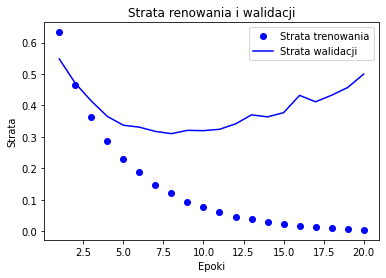

In [31]:
# Tworzenie wykresu start tenowania i walidacji
plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata renowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()

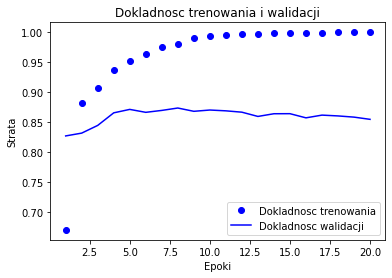

In [32]:
# Tworzenie wykresu dokładności trenowania i walidacji
plt.clf() # Czyszczenie rysunku(wazne)
acc_values = history_dict['acc']
val_acc_vales = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'b', label='Dokladnosc walidacji')
plt.title('Dokladnosc trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()

plt.show()

In [33]:
min_loss_val = min(val_loss)
max_acc_val = max(val_acc)

min_loss_ix = val_loss.index(min_loss_val)
max_acc_ix = val_acc.index(max_acc_val)
print(f'{min_loss_ix} --- {max_acc_ix}')

7 --- 7


Po 7 epoce model zaczyna być przetrenowany

In [34]:
model.fit(x_train, y_train, epochs=7, batch_size=512, validation_data=(x_val, y_val))

Train on 25000 samples, validate on 20000 samples
Epoch 1/7
25000/25000 [==============================] - 5s 180us/step - loss: 0.3325 - acc: 0.8933 - val_loss: 0.2550 - val_acc: 0.9036
Epoch 2/7
25000/25000 [==============================] - 4s 174us/step - loss: 0.2126 - acc: 0.9207 - val_loss: 0.1963 - val_acc: 0.9266
Epoch 3/7
25000/25000 [==============================] - 4s 174us/step - loss: 0.1730 - acc: 0.9357 - val_loss: 0.1623 - val_acc: 0.9403
Epoch 4/7
25000/25000 [==============================] - 4s 176us/step - loss: 0.1441 - acc: 0.9458 - val_loss: 0.1304 - val_acc: 0.9542
Epoch 5/7
25000/25000 [==============================] - 4s 173us/step - loss: 0.1204 - acc: 0.9555 - val_loss: 0.1144 - val_acc: 0.9587
Epoch 6/7
25000/25000 [==============================] - 4s 172us/step - loss: 0.1027 - acc: 0.9640 - val_loss: 0.0872 - val_acc: 0.9725
Epoch 7/7
25000/25000 [==============================] - 4s 175us/step - loss: 0.0857 - acc: 0.9708 - val_loss: 0.0732 - val_acc

In [35]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 72us/step


In [36]:
results

[0.43132546721458437, 0.86596]

## Wiecej warstw ukrytych

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=['accuracy'])

In [46]:
model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Train on 25000 samples, validate on 20000 samples
Epoch 1/10
25000/25000 [==============================] - 5s 195us/step - loss: 0.4693 - acc: 0.8129 - val_loss: 0.2898 - val_acc: 0.9149
Epoch 2/10
25000/25000 [==============================] - 4s 173us/step - loss: 0.2685 - acc: 0.9068 - val_loss: 0.1943 - val_acc: 0.9414
Epoch 3/10
25000/25000 [==============================] - 4s 174us/step - loss: 0.2045 - acc: 0.9293 - val_loss: 0.1768 - val_acc: 0.9363
Epoch 4/10
25000/25000 [==============================] - 4s 173us/step - loss: 0.1681 - acc: 0.9418 - val_loss: 0.1281 - val_acc: 0.9627
Epoch 5/10
25000/25000 [==============================] - 4s 172us/step - loss: 0.1484 - acc: 0.9493 - val_loss: 0.1158 - val_acc: 0.9645
Epoch 6/10
25000/25000 [==============================] - 4s 173us/step - loss: 0.1293 - acc: 0.9563 - val_loss: 0.1697 - val_acc: 0.9266
Epoch 7/10
25000/25000 [==============================] - 4s 170us/step - loss: 0.1152 - acc: 0.9608 - val_loss: 0.1043 - 

In [47]:
results

[0.456285101146698, 0.85772]

## Wieksza ilosc jednostek ukrytych

In [48]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

results

Train on 25000 samples, validate on 20000 samples
Epoch 1/10
25000/25000 [==============================] - 6s 243us/step - loss: 0.4332 - acc: 0.8121 - val_loss: 0.2595 - val_acc: 0.9055
Epoch 2/10
25000/25000 [==============================] - 5s 217us/step - loss: 0.2454 - acc: 0.9061 - val_loss: 0.1678 - val_acc: 0.9447
Epoch 3/10
25000/25000 [==============================] - 5s 213us/step - loss: 0.1899 - acc: 0.9277 - val_loss: 0.1523 - val_acc: 0.9448
Epoch 4/10
25000/25000 [==============================] - 5s 212us/step - loss: 0.1546 - acc: 0.9405 - val_loss: 0.1261 - val_acc: 0.9543
Epoch 5/10
25000/25000 [==============================] - 5s 217us/step - loss: 0.1230 - acc: 0.9549 - val_loss: 0.0732 - val_acc: 0.9782
Epoch 6/10
25000/25000 [==============================] - 5s 216us/step - loss: 0.1051 - acc: 0.9616 - val_loss: 0.0589 - val_acc: 0.9832
Epoch 7/10
25000/25000 [==============================] - 5s 217us/step - loss: 0.0836 - acc: 0.9698 - val_loss: 0.0770 - 

[0.5749954341518879, 0.85908]

## Funkcja straty mse

In [49]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.mse, metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

results

Train on 25000 samples, validate on 20000 samples
Epoch 1/10
25000/25000 [==============================] - 6s 240us/step - loss: 0.1502 - acc: 0.8012 - val_loss: 0.0788 - val_acc: 0.9103
Epoch 2/10
25000/25000 [==============================] - 5s 214us/step - loss: 0.0760 - acc: 0.9044 - val_loss: 0.0499 - val_acc: 0.9434
Epoch 3/10
25000/25000 [==============================] - 5s 214us/step - loss: 0.0576 - acc: 0.9267 - val_loss: 0.0397 - val_acc: 0.9535
Epoch 4/10
25000/25000 [==============================] - 5s 211us/step - loss: 0.0463 - acc: 0.9422 - val_loss: 0.0295 - val_acc: 0.9670
Epoch 5/10
25000/25000 [==============================] - 5s 212us/step - loss: 0.0392 - acc: 0.9509 - val_loss: 0.0253 - val_acc: 0.9718
Epoch 6/10
25000/25000 [==============================] - 5s 206us/step - loss: 0.0323 - acc: 0.9610 - val_loss: 0.0270 - val_acc: 0.9699
Epoch 7/10
25000/25000 [==============================] - 5s 205us/step - loss: 0.0255 - acc: 0.9704 - val_loss: 0.0164 - 

[0.10705944943904877, 0.86808]